In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from utils import *
from Network import *

%matplotlib notebook
import matplotlib.pyplot as plt

#hyperparams
enc_seq_len = 6
dec_seq_len = 2
output_sequence_length = 1

dim_val = 10
dim_attn = 5
lr = 0.002
epochs = 20

n_heads = 3 

n_decoder_layers = 3
n_encoder_layers = 3

batch_size = 15

#init network and optimizer
t = Transformer(dim_val, dim_attn, 1,dec_seq_len,  output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads)
optimizer = torch.optim.Adam(t.parameters(), lr=lr)

#keep track of loss for graph
losses = []

In [7]:
#build live matplotlib fig
# fig = plt.figure()

# ax = fig.add_subplot(111)
# plt.ion()

# fig.show()
# fig.canvas.draw()

    
for e in range(epochs):
    out = []
    
    for b in range(-10- enc_seq_len, 10 - enc_seq_len):
        optimizer.zero_grad()
        X, Y = get_data(batch_size, enc_seq_len, output_sequence_length)
        
        #Forward pass and calculate loss
        net_out = t(X)
        #print(net_out.shape,Y.shape)
        loss = torch.mean((net_out - Y) ** 2)

        #backwards pass
        loss.backward()
        optimizer.step()

        #Track losses and draw rgaph
        out.append([net_out.detach().numpy(), Y])
        losses.append(loss)
        print(loss)
#         ax.clear()
#         ax.plot(losses)
#         ax.set_title("Mean Squared Error")
#         fig.canvas.draw()



tensor(0.0069, grad_fn=<MeanBackward0>)
tensor(0.0082, grad_fn=<MeanBackward0>)
tensor(0.0099, grad_fn=<MeanBackward0>)
tensor(0.0041, grad_fn=<MeanBackward0>)
tensor(0.0057, grad_fn=<MeanBackward0>)
tensor(0.0044, grad_fn=<MeanBackward0>)
tensor(0.0082, grad_fn=<MeanBackward0>)
tensor(0.0074, grad_fn=<MeanBackward0>)
tensor(0.0071, grad_fn=<MeanBackward0>)
tensor(0.0074, grad_fn=<MeanBackward0>)
tensor(0.0055, grad_fn=<MeanBackward0>)
tensor(0.0062, grad_fn=<MeanBackward0>)
tensor(0.0077, grad_fn=<MeanBackward0>)
tensor(0.0068, grad_fn=<MeanBackward0>)
tensor(0.0049, grad_fn=<MeanBackward0>)
tensor(0.0075, grad_fn=<MeanBackward0>)
tensor(0.0047, grad_fn=<MeanBackward0>)
tensor(0.0062, grad_fn=<MeanBackward0>)
tensor(0.0037, grad_fn=<MeanBackward0>)
tensor(0.0054, grad_fn=<MeanBackward0>)
tensor(0.0056, grad_fn=<MeanBackward0>)
tensor(0.0043, grad_fn=<MeanBackward0>)
tensor(0.0052, grad_fn=<MeanBackward0>)
tensor(0.0095, grad_fn=<MeanBackward0>)
tensor(0.0085, grad_fn=<MeanBackward0>)


tensor(0.0024, grad_fn=<MeanBackward0>)
tensor(0.0021, grad_fn=<MeanBackward0>)
tensor(0.0049, grad_fn=<MeanBackward0>)
tensor(0.0052, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0050, grad_fn=<MeanBackward0>)
tensor(0.0030, grad_fn=<MeanBackward0>)
tensor(0.0022, grad_fn=<MeanBackward0>)
tensor(0.0013, grad_fn=<MeanBackward0>)
tensor(0.0022, grad_fn=<MeanBackward0>)
tensor(0.0028, grad_fn=<MeanBackward0>)
tensor(0.0045, grad_fn=<MeanBackward0>)
tensor(0.0037, grad_fn=<MeanBackward0>)
tensor(0.0031, grad_fn=<MeanBackward0>)
tensor(0.0014, grad_fn=<MeanBackward0>)
tensor(0.0031, grad_fn=<MeanBackward0>)
tensor(0.0019, grad_fn=<MeanBackward0>)
tensor(0.0037, grad_fn=<MeanBackward0>)
tensor(0.0028, grad_fn=<MeanBackward0>)
tensor(0.0042, grad_fn=<MeanBackward0>)
tensor(0.0029, grad_fn=<MeanBackward0>)
tensor(0.0022, grad_fn=<MeanBackward0>)
tensor(0.0017, grad_fn=<MeanBackward0>)
tensor(0.0032, grad_fn=<MeanBackward0>)
tensor(0.0025, grad_fn=<MeanBackward0>)


In [4]:
out

[[array([[0.68190265],
         [0.99807215],
         [0.86231965],
         [0.9988152 ],
         [0.98559296],
         [0.68190265],
         [0.2417469 ],
         [0.06691147],
         [0.13197428],
         [0.98559296],
         [0.08513225],
         [0.08513225],
         [0.68190265],
         [0.86231965],
         [0.44152534]], dtype=float32),
  tensor([[0.7311],
          [0.9933],
          [0.8808],
          [0.9997],
          [0.9820],
          [0.7311],
          [0.2689],
          [0.0180],
          [0.1192],
          [0.9820],
          [0.0474],
          [0.0474],
          [0.7311],
          [0.8808],
          [0.5000]])],
 [array([[0.9971477 ],
         [0.06494716],
         [1.0000314 ],
         [0.99784875],
         [0.06494716],
         [0.06494716],
         [0.44011042],
         [0.9971477 ],
         [0.86136365],
         [0.6807885 ],
         [0.9500904 ],
         [0.44011042],
         [0.98468363],
         [0.98468363],
         [0.9

<IPython.core.display.Javascript object>


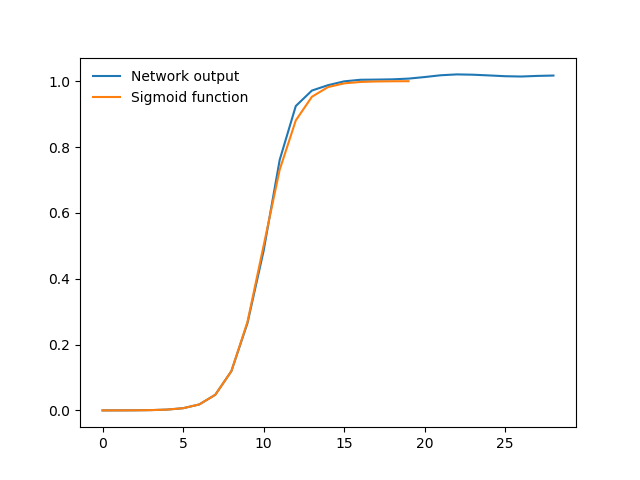

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

o = []
x = [torch.sigmoid(torch.arange(-10,-1).float()).unsqueeze(-1).numpy().tolist()]

#Draw graph comparing to sigmoid
for i in range(-10, 10, output_sequence_length):
    o.append([torch.sigmoid(torch.tensor(i).float())])
    q = torch.tensor(x).float()
    
    if(output_sequence_length == 1):
        x[0].append([t(q).detach().squeeze().numpy()])
    else:
        for a in t(q).detach().squeeze().numpy():
            x[0].append([a])
            
ax.clear()
ax.plot(x[0], label='Network output')
ax.plot(o, label='Sigmoid function')
ax.set_title("")
ax.legend(loc='upper left', frameon=False)
